In [25]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from insightface.app import FaceAnalysis

In [2]:
app = FaceAnalysis(name='buffalo_l', root='models', providers=['CUDAExecutionProvider'])

app.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


## Extract Facial Features and Labels

In [11]:
import re

def clean_name(name):
    name = re.sub(r'[^A-Za-z]', ' ', name)
    name = name.title()
    return name

In [17]:
person_info = []

directories = os.listdir(path='images')

for directory in directories:
    role, name = directory.split('-')
    name = clean_name(name)
    role = clean_name(role)
    print('Role = ', role, end='\t')
    print('Name = ', name)

    # path of each image in respective directory
    images = os.listdir(path='images/' + directory)
    for image in images:
        # path of each image
        path = './images/' + directory + '/' + image

        # 1. read image
        img_arr = cv2.imread(path)
        
        # 2. get info
        result = app.get(img_arr, max_num=1) # max_num = 1, because we only have 1 face in each image

        if len(result) > 0:
            res = result[0]
            # 3. get embedding
            embedding = res['embedding']
        elif len(result) == 0:
            print('No face detected in ', path)
            continue

        # 4. save all info and embedding in a list
        person_info.append([role, name, embedding])

Role =  Student	Name =  Angelina Jolie


/mnt/d/aloka-vision/aloka-vision-venv/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


Role =  Student	Name =  Chris Evans
Role =  Student	Name =  Scarlett Johansson
Role =  Teacher	Name =  Barack Obama
Role =  Teacher	Name =  Morgan Freeman


In [19]:
df = pd.DataFrame(person_info, columns=['role', 'name', 'facial_features'])
df # it will store in database in the future

,role,name,facial_features
0,Student,Angelina Jolie,"[0.07824361, 1.9015113, -0.023395985, -0.93351..."
1,Student,Angelina Jolie,"[0.2310524, 0.97989607, -0.72453475, -0.320673..."
2,Student,Angelina Jolie,"[0.07103528, 2.1639588, -0.3409844, -0.7473231..."
3,Student,Angelina Jolie,"[0.4855191, 2.114588, 0.4463554, -0.664585, -0..."
4,Student,Angelina Jolie,"[-0.08823502, 1.5141321, -0.18750465, -1.34230..."
5,Student,Angelina Jolie,"[-0.54577935, 1.5319035, -0.12923717, -1.15202..."
6,Student,Angelina Jolie,"[0.9446974, 1.6263472, -0.25197536, -1.4123584..."
7,Student,Angelina Jolie,"[0.42334622, 0.33403736, 0.12036865, 0.0760047..."
8,Student,Angelina Jolie,"[-0.36375806, 1.3726236, 0.06761645, -0.857597..."
9,Student,Angelina Jolie,"[0.7520716, 1.2098383, 0.043703765, -1.4506797..."


### TEST IMAGE

#### 1. Read image

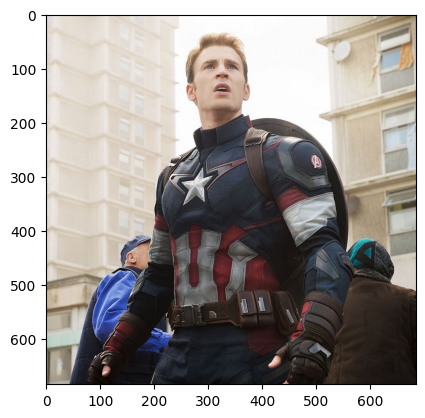

In [37]:
img_test = cv2.imread('test_images/test_2.jpeg')
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show()

#### 2. Extract facial features

In [38]:
res_test = app.get(img_test, max_num=0) # max_num = 0, because we don't know how many faces in the image

for i, res in enumerate(res_test):
    print('Face ', i+1, 'detected')
    bbox = res['bbox'].astype(int)
    score = int(res['det_score']*100)
    embed_test = res['embedding']

Face  1 detected


In [40]:
X_list = df['facial_features'].tolist()

X = np.array(X_list)

In [42]:
X.shape

(50, 512)

In [43]:
from sklearn.metrics import pairwise

In [45]:
y = embed_test.reshape(1, -1) # reshape to 1 row, n columns

euclidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distance = pairwise.manhattan_distances(X, y)
cosine_similarity = pairwise.cosine_similarity(X, y)

In [46]:
data_search = df.copy()
data_search['euclidean_distance'] = euclidean_distance
data_search['manhattan_distance'] = manhattan_distance
data_search['cosine_similarity'] = cosine_similarity

In [47]:
data_search

,role,name,facial_features,euclidean_distance,manhattan_distance,cosine_similarity
0,Student,Angelina Jolie,"[0.07824361, 1.9015113, -0.023395985, -0.93351...",29.976627,536.054702,-0.004487
1,Student,Angelina Jolie,"[0.2310524, 0.97989607, -0.72453475, -0.320673...",29.810110,543.882129,0.013862
2,Student,Angelina Jolie,"[0.07103528, 2.1639588, -0.3409844, -0.7473231...",28.812086,512.476728,0.025873
3,Student,Angelina Jolie,"[0.4855191, 2.114588, 0.4463554, -0.664585, -0...",29.295267,530.584194,0.031181
4,Student,Angelina Jolie,"[-0.08823502, 1.5141321, -0.18750465, -1.34230...",28.864429,516.796372,0.021957
5,Student,Angelina Jolie,"[-0.54577935, 1.5319035, -0.12923717, -1.15202...",29.560493,532.974385,-0.007491
6,Student,Angelina Jolie,"[0.9446974, 1.6263472, -0.25197536, -1.4123584...",30.540520,553.374599,0.019033
7,Student,Angelina Jolie,"[0.42334622, 0.33403736, 0.12036865, 0.0760047...",29.892664,537.213897,-0.009802
8,Student,Angelina Jolie,"[-0.36375806, 1.3726236, 0.06761645, -0.857597...",29.300167,532.975865,0.036033
9,Student,Angelina Jolie,"[0.7520716, 1.2098383, 0.043703765, -1.4506797...",30.806198,552.221281,0.009243


In [48]:
data_search.head(2)

,role,name,facial_features,euclidean_distance,manhattan_distance,cosine_similarity
0,Student,Angelina Jolie,"[0.07824361, 1.9015113, -0.023395985, -0.93351...",29.976627,536.054702,-0.004487
1,Student,Angelina Jolie,"[0.2310524, 0.97989607, -0.72453475, -0.320673...",29.810110,543.882129,0.013862


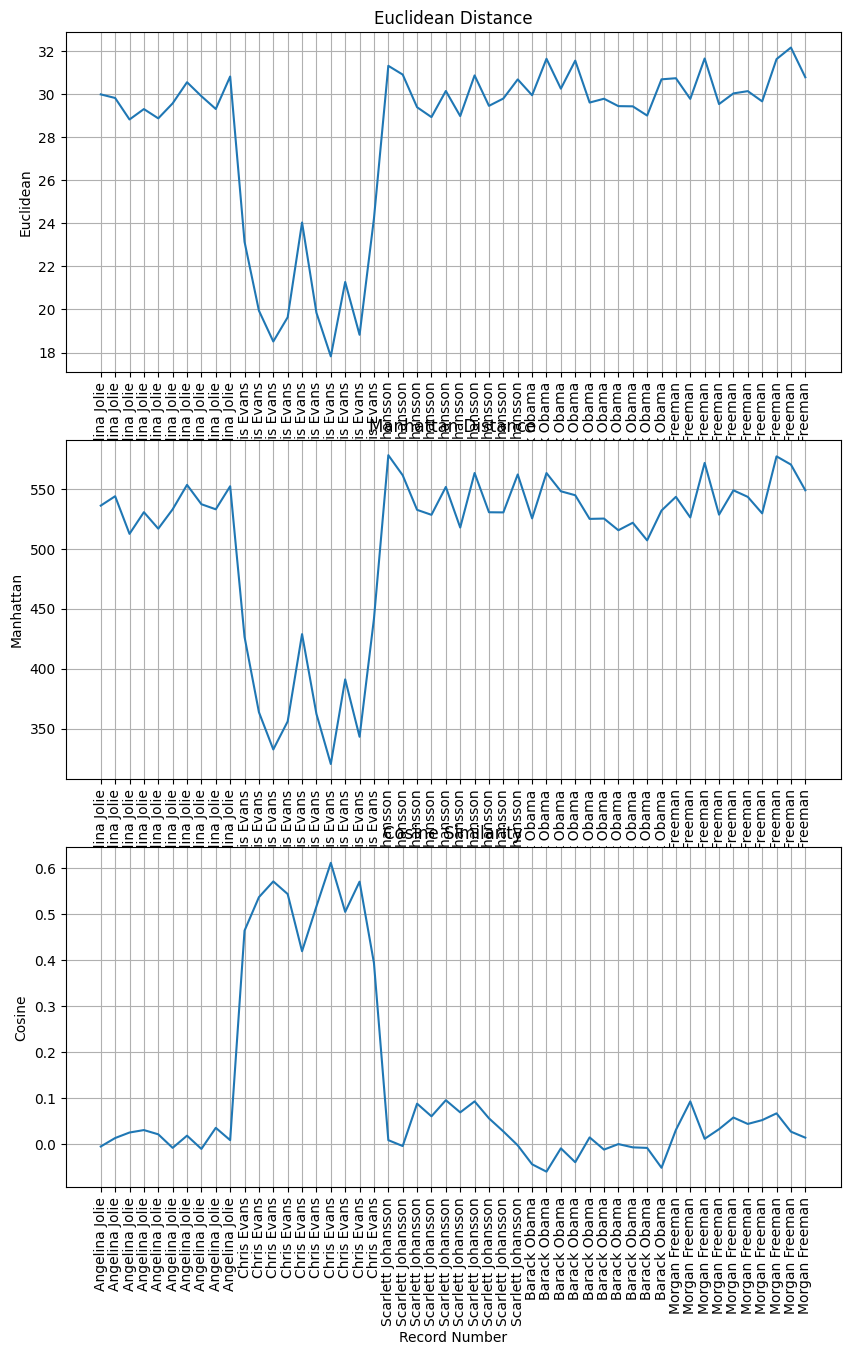

In [59]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.plot(data_search['euclidean_distance'])
plt.xticks(ticks=list(range(len(data_search['euclidean_distance']))), labels=data_search['name'], rotation=90)
plt.title('Euclidean Distance')
plt.xlabel('Record Number')
plt.ylabel('Euclidean')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan_distance'])
plt.xticks(ticks=list(range(len(data_search['manhattan_distance']))), labels=data_search['name'], rotation=90)
plt.title('Manhattan Distance')
plt.xlabel('Record Number')
plt.ylabel('Manhattan')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine_similarity'])
plt.xticks(ticks=list(range(len(data_search['cosine_similarity']))), labels=data_search['name'], rotation=90)
plt.title('Cosine Similarity')
plt.xlabel('Record Number')
plt.ylabel('Cosine')
plt.grid()

plt.show()

### Identify Faces using Euclidean Distance

In [60]:
d_eq_optimal = 25

In [66]:
data_filter = data_search.query('euclidean_distance <= @d_eq_optimal')
data_filter.reset_index(drop=True, inplace=True)


if(len(data_filter)>0):
    argmin = data_filter['euclidean_distance'].argmin()
    print('The most similar person is ', data_filter['name'][argmin], 'with distance ', data_filter['euclidean_distance'][argmin])
    print(data_filter.loc[argmin][['name', 'role', 'euclidean_distance']])
else:
    print('No person found')
    

The most similar person is  Chris Evans with distance  17.821804
name                  Chris Evans
role                      Student
euclidean_distance      17.821804
Name: 6, dtype: object


### Identify Faces using Manhattan Distance

In [67]:
d_man_optimal = 450

In [68]:
data_filter = data_search.query('manhattan_distance <= @d_man_optimal')
data_filter.reset_index(drop=True, inplace=True)

if(len(data_filter)>0):
    argmin = data_filter['manhattan_distance'].argmin()
    print('The most similar person is ', data_filter['name'][argmin], 'with distance ', data_filter['manhattan_distance'][argmin])
    print(data_filter.loc[argmin][['name', 'role', 'manhattan_distance']])
else:
    print('No person found')


The most similar person is  Chris Evans with distance  320.37948003504425
name                  Chris Evans
role                      Student
manhattan_distance      320.37948
Name: 6, dtype: object


### Identify Faces using Cosine Similarity

In [75]:
s_optimal = 0.5

In [76]:
data_filter = data_search.query('cosine_similarity >= @s_optimal')
data_filter.reset_index(drop=True, inplace=True)

if(len(data_filter)>0):
    argmax = data_filter['cosine_similarity'].argmax()
    print('The most similar person is ', data_filter['name'][argmax], 'with similarity ', data_filter['cosine_similarity'][argmax])
    print(data_filter.loc[argmax][['name', 'role', 'cosine_similarity']])
else:
    print('No person found')
    

The most similar person is  Chris Evans with similarity  0.611929
name                 Chris Evans
role                     Student
cosine_similarity       0.611929
Name: 4, dtype: object


### Identify Multiple Faces in an Image

In [96]:
def ml_search_algorithm(dataframe, feature_column, test_vector, thresh=0.5):
  """ 
  Cosine similarity search algorithm
  """
  # 1. take dataframe (collection of all data)
  dataframe = dataframe.copy()
  
  # 2. index face embedding from dataframe and convert into array
  X_list = dataframe[feature_column].tolist()
  X = np.array(X_list)
  
  # 3. Calculate cosine similarity between face embedding from dataframe and face embedding from test image
  similarity = pairwise.cosine_similarity(X, test_vector.reshape(1, -1))
  similarity_arr = np.array(similarity).flatten()
  dataframe['cosine_similarity'] = similarity_arr
  
  # 4. filter the dataframe based on cosine similarity
  data_filter = dataframe.query('cosine_similarity >= @thresh')
  if len(data_filter) > 0:
    # 5. get the most similar person from filtered dataframe
    data_filter.reset_index(drop=True, inplace=True)
    argmax = data_filter['cosine_similarity'].argmax()
    name, role, similarity = data_filter.loc[argmax][['name', 'role', 'cosine_similarity']]
    # print('The most similar person is ', name, 'with similarity ', similarity)
  else:
    name, role, similarity = 'Unknown', 'Unknown', None
    # print('No person found')
  return name, role, similarity
  

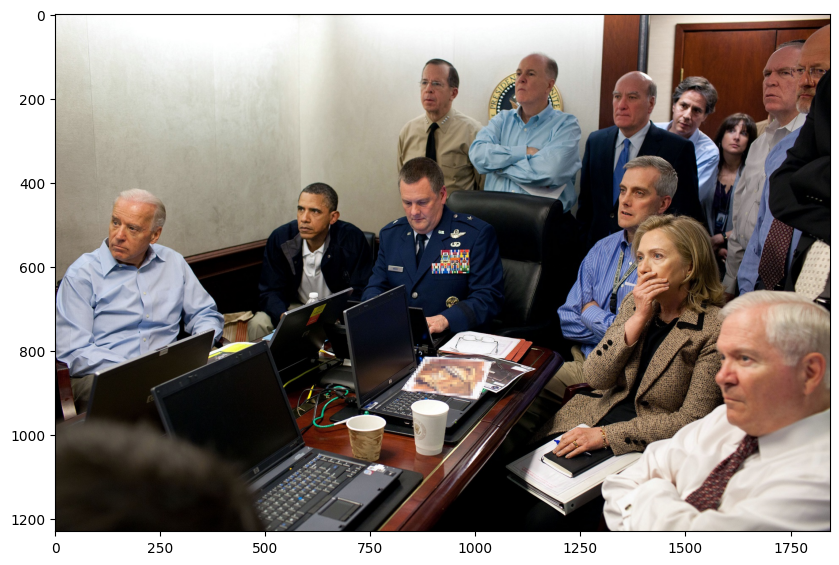

In [122]:
test_image = cv2.imread('test_images/test_11.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

/mnt/d/aloka-vision/aloka-vision-venv/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


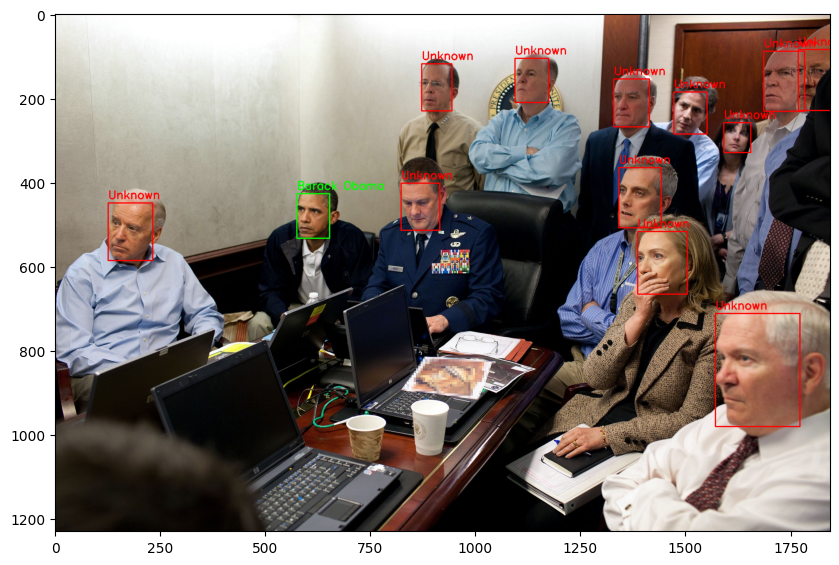

In [125]:
# 1. take test image and apply face detection using insightface
results = app.get(test_image)
test_copy = test_image.copy()

# 2. use for loop and extract face embedding from each face detected and pass it to ml_search_algorithm function
for i, res in enumerate(results):
  x1, y1, x2, y2 = res['bbox'].astype(int)
  embedding = res['embedding']
  name, role, similarity = ml_search_algorithm(df_compress, 'facial_features', test_vector=embedding, thresh=0.5)
  # print(name, role, similarity)

  if name == 'Unknown':
    cv2.rectangle(test_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(test_copy, name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
  else:
    cv2.rectangle(test_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(test_copy, name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(test_copy, cv2.COLOR_BGR2RGB))
plt.show()

### Compressing dataset

In [124]:
# compress dataframe to reduce computation time using groupby and mean
df_compress = df.groupby(['role', 'name']).mean().reset_index() # groupby role and name, then calculate mean of facial_features
df_compress

,role,name,facial_features
0,Student,Angelina Jolie,"[0.19881932, 1.4748837, -0.0979588, -0.8805054..."
1,Student,Chris Evans,"[0.35691047, -0.41491055, 0.039218444, -0.1543..."
2,Student,Scarlett Johansson,"[-0.13535985, -0.2821385, -0.42700845, -0.2825..."
3,Teacher,Barack Obama,"[-0.22177827, 1.5762169, -0.5030781, 0.1360128..."
4,Teacher,Morgan Freeman,"[0.76278937, 0.890615, 0.46873552, 0.25898102,..."


### Convert dataframe to array and save in numpy zip format

In [126]:
xvalues = df_compress.values

In [128]:
col_names = df_compress.columns
col_names

Index(['role', 'name', 'facial_features'], dtype='object')

In [131]:
np.savez('datasets/face_recognition.npz', xvalues=xvalues, col_names=col_names)

In [133]:
# load npz file
data = np.load('datasets/face_recognition.npz', allow_pickle=True)
xvalues = data['xvalues']
col_names = data['col_names']


In [134]:
data.files

['xvalues', 'col_names']

In [135]:
pd.DataFrame(xvalues, columns=col_names)

,role,name,facial_features
0,Student,Angelina Jolie,"[0.19881932, 1.4748837, -0.0979588, -0.8805054..."
1,Student,Chris Evans,"[0.35691047, -0.41491055, 0.039218444, -0.1543..."
2,Student,Scarlett Johansson,"[-0.13535985, -0.2821385, -0.42700845, -0.2825..."
3,Teacher,Barack Obama,"[-0.22177827, 1.5762169, -0.5030781, 0.1360128..."
4,Teacher,Morgan Freeman,"[0.76278937, 0.890615, 0.46873552, 0.25898102,..."
